In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Principal Component Analysis

An unsupervised transformation that is somewhat more interesting is **Principle Component Analysis** (PCA).
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

That is, we find new features to represent the data that are a **linear combination** of the old data (i.e. we rotate it).

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. 

In scikit-learn, PCA is implemented as a transformer object that learns `n_components` in its `fit` method, 
and can be used on new data to project it on these components.


In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [4]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Then we can transform the data, projected on the principal components:

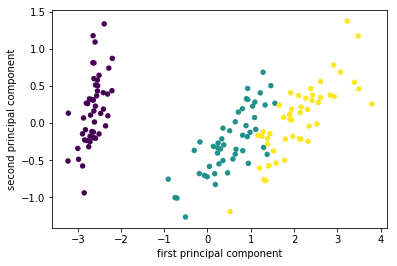

In [5]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

On the **right** of the plot you can see the four points that were on the top **right** before. 

PCA found fit first component to be along the diagonal, and the second to be perpendicular to it. 

As PCA finds a rotation, the principal components are always at right angles to each other.

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## Manifold Learning

One weakness of PCA is that it cannot detect non-linear features.  

A set of algorithms known as *Manifold Learning* have been developed to address
this deficiency.  

A canonical dataset used in Manifold learning is the *S-curve*, which we briefly saw in an earlier section:

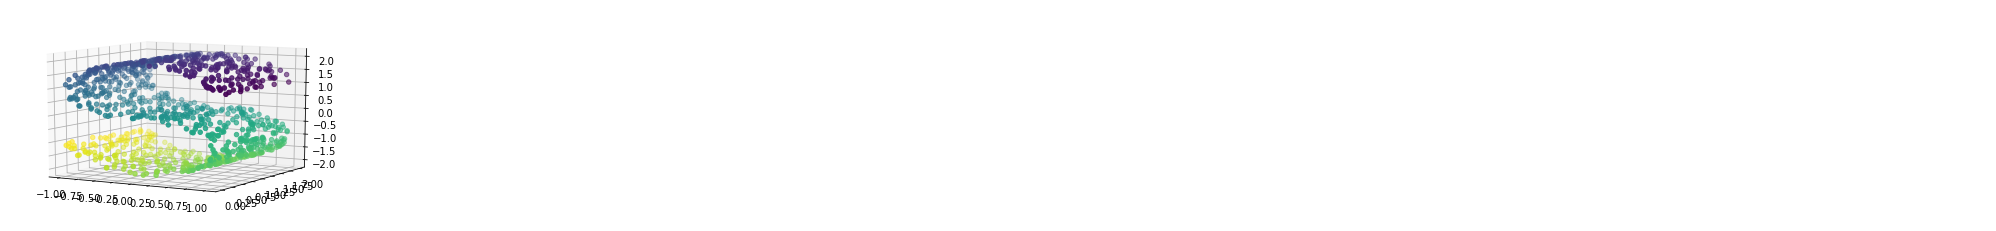

In [7]:
from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -60)

This is a 2-dimensional dataset embedded in three dimensions, but it is embedded
in such a way that PCA cannot discover the underlying data orientation:

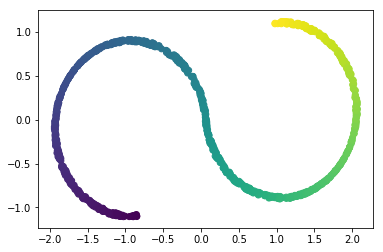

In [8]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

Manifold learning algorithms, however, available in the ``sklearn.manifold``
submodule, are able to recover the underlying 2-dimensional manifold:

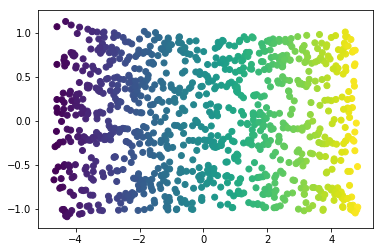

In [9]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y)
plt.show()

## IsoMap

One of the earliest approaches to manifold learning is the **Isomap** algorithm, short for **Isometric Mapping**. 

Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. 

Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. 

## Exercise
Compare the results of Isomap and  PCA on a 5-class subset of the digits dataset (``load_digits(5)``).

__Bonus__: Also compare to TSNE, another popular manifold learning technique.

In [10]:
from sklearn.datasets import load_digits

digits = load_digits(5)

X = digits.data
# ...